<a href="https://colab.research.google.com/github/mbl-cin/project_NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenizer text

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np # imports numpy
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [ ]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Hey you look out'
    'Do you think my dog is amazing?'
]

In [ ]:
tokenizer = Tokenizer(num_words = 100, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'you': 5, 'i': 6, 'cat': 7, 'hey': 8, 'look': 9, 'outdo': 10, 'think': 11, 'is': 12, 'amazing': 13}


# Sequence -> Data

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post', maxlen=5, truncating='post')
print(sequences)
print(padded)

[[6, 3, 2, 4], [6, 3, 2, 7], [5, 3, 2, 4], [8, 5, 9, 10, 5, 11, 2, 4, 12, 13]]
[[ 6  3  2  4  0]
 [ 6  3  2  7  0]
 [ 5  3  2  4  0]
 [ 8  5  9 10  5]]


# Detecting sarcasm in sentences

In [ ]:
import json

# Use json.loads to read the whole file
with open('/content/Sarcasm_Headlines_Dataset.json', 'r') as f:
  data = f.read()

# Split the file into separate JSON objects
datastore = [json.loads(line) for line in data.splitlines()]

In [ ]:
datastore[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [ ]:
sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [ ]:
print(sentences[0])
print(labels[0])
print(urls[0])

former versace store clerk sues over secret 'black code' for minority shoppers
0
https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5


In [ ]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index), "\n")
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

29657 

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [ ]:
training_size = 20000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
vocab_size = len(word_index)
tokanizer = Tokenizer(num_words=vocab_size,oov_token='<OOV>')
tokanizer.fit_on_texts(training_sentences)
word_index = tokanizer.word_index

In [ ]:
training_sequences = tokanizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=100, padding='post', truncating='post')

testing_sequences = tokanizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=100, padding='post', truncating='post')

Embbedings

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
import numpy as np # imports numpy

num_epochs = 30
# convert training_labels to a numpy array
training_labels = np.array(training_labels)
# convert testing_labels to a numpy array
testing_labels = np.array(testing_labels) # convert testing_labels to numpy array
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 4.6143e-04 - accuracy: 0.9999 - val_loss: 1.2871 - val_accuracy: 0.8223 - 2s/epoch - 3ms/step
Epoch 2/30
625/625 - 2s - loss: 2.4374e-04 - accuracy: 1.0000 - val_loss: 1.2989 - val_accuracy: 0.8202 - 2s/epoch - 4ms/step
Epoch 3/30
625/625 - 2s - loss: 1.7882e-04 - accuracy: 1.0000 - val_loss: 1.3454 - val_accuracy: 0.8098 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 1.6989e-04 - accuracy: 1.0000 - val_loss: 1.4000 - val_accuracy: 0.8217 - 2s/epoch - 4ms/step
Epoch 5/30
625/625 - 3s - loss: 1.0312e-04 - accuracy: 1.0000 - val_loss: 1.4561 - val_accuracy: 0.8202 - 3s/epoch - 5ms/step
Epoch 6/30
625/625 - 2s - loss: 7.5505e-05 - accuracy: 1.0000 - val_loss: 1.4848 - val_accuracy: 0.8199 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 1.4999 - val_accuracy: 0.8214 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 6.4821e-05 - accuracy: 1.0000 - val_loss: 1.5213 - val_accuracy: 0.8199 - 2s/epoch - 4ms/s

In [ ]:
sentence=[
    'granny starting to fear spiders in the garden might be real',
    'the weather today is bright and sunny'
]
# the closer to 10 the more sarcastic it is
sequences = tokanizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
print(model.predict(padded))

1/1 [==============================] - 0s 17ms/step
[[9.9989820e-01]
 [1.7275703e-05]]


# LSTM

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')


])

# Training AI to generate text

In [ ]:
tokenizer = Tokenizer()
data = '''In the town of Athy one Jeremy Lanigan\nBattered away 'til he hadn't a pound.\nHis father he died and made him a man again\nLeft him a farm and ten acres of ground.\nHe gave a grand party to friends and relations\nWho didn't forget him when it comes to the will,\nIf you'll but listen I'll make your eyes glisten\nOf the rows and the ructions of Lanigan's Ball.\nMyself to be sure got free invitation,\nFor all the nice girls and boys I might ask,\nAnd just in a minute both friends and relations\nWere dancing 'round merry as bees 'round a cask.\nJudy O'Daly, that nice little milliner,\nShe tipped me a wink for to give her a call,\nAnd I soon arrived with Peggy McGilligan\nJust in time for Lanigan's Ball.\nThere were lashings of punch and wine for the ladies,\n
Potatoes and cakes; there was bacon and tea,\n
There were the Nolans, Dolans, O'Gradys\n
Courting the girls and dancing away.\n
Songs they went 'round as plenty as water,\n
"The harp that once sounded in Tara's old hall,"\n
"Sweet Nelly Gray" and "The Rat Catcher's Daughter,"\n
All singing together at Lanigan's Ball.\n
They were doing all kinds of nonsensical polkas\n
All 'round the room in a whirligig.\n
Julia and I, we banished their nonsense\n
And tipped them the twist of a reel and a jig.\n
&'Och mavrone, how the girls got all mad at me\n
Danced 'til you'd think the ceiling would fall.\n
For I spent three weeks at Brooks' Academy\n
Learning new steps for Lanigan's Ball.\n
Boys were all merry and the girls they were hearty\n
And danced all around in couples and groups,\n
'Til an accident happened, young Terrance McCarthy\n
Put his right leg through Miss Finnerty's hoops.\n
Poor creature fainted and cried, ``Meelia murther,''\n
Called for her brothers and gathered them all.\n
Carmody swore that he'd go no further\n
'Til he had satisfaction at Lanigan's Ball.\n
In the midst of the row miss Kerrigan fainted,\n
Her cheeks at the same time as red as a rose.\n
Some of the lads declared she was painted,\n
She took a small drop too much, I suppose.\n
Her sweetheart, Ned Morgan, so powerful and able,\n
When he saw his fair colleen stretched out by the wall,\n
Tore the left leg from under the table\n
And smashed all the Chaneys at Lanigan's Ball.\n
Boys, oh boys, 'twas then there were runctions.\n
Myself got a lick from big Phelim McHugh.\n
I soon replied to his introduction\n
And kicked up a terrible hullabaloo.\n
Ould Casey, the piper, was near being strangled.\n
They squeezed up his pipes, bellows, chanters and all.\n
The girls, in their ribbons, they got all entangled\n
And that put an end to Lanigan's Ball.'''
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

6
2
53
5
54
55
56
57


In [ ]:
print(xs[6])

[ 0  0  0  6  2 53  5 54 55 56]


In [ ]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  6  2 53  5 54 55]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'all': 4, 'of': 5, 'in': 6, "lanigan's": 7, 'ball': 8, 'for': 9, 'were': 10, 'to': 11, 'i': 12, 'at': 13, 'he': 14, 'his': 15, 'girls': 16, 'as': 17, 'they': 18, "'til": 19, 'got': 20, 'boys': 21, "'round": 22, 'that': 23, 'her': 24, 'there': 25, 'him': 26, 'she': 27, 'was': 28, 'away': 29, 'left': 30, 'friends': 31, 'relations': 32, 'when': 33, 'myself': 34, 'nice': 35, 'just': 36, 'dancing': 37, 'merry': 38, 'tipped': 39, 'me': 40, 'soon': 41, 'time': 42, 'their': 43, 'them': 44, 'danced': 45, 'an': 46, 'put': 47, 'leg': 48, 'miss': 49, 'fainted': 50, 'from': 51, 'up': 52, 'town': 53, 'athy': 54, 'one': 55, 'jeremy': 56, 'lanigan': 57, 'battered': 58, "hadn't": 59, 'pound': 60, 'father': 61, 'died': 62, 'made': 63, 'man': 64, 'again': 65, 'farm': 66, 'ten': 67, 'acres': 68, 'ground': 69, 'gave': 70, 'grand': 71, 'party': 72, 'who': 73, "didn't": 74, 'forget': 75, 'it': 76, 'comes': 77, 'will': 78, 'if': 79, "you'll": 80, 'but': 81, 'listen': 82, "i'll": 8

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
13/13 [==============================] - 6s 133ms/step - loss: 5.5527 - accuracy: 0.0273
Epoch 2/100
13/13 [==============================] - 1s 84ms/step - loss: 5.3549 - accuracy: 0.0596
Epoch 3/100
13/13 [==============================] - 1s 106ms/step - loss: 5.1340 - accuracy: 0.0670
Epoch 4/100
13/13 [==============================] - 1s 58ms/step - loss: 5.0758 - accuracy: 0.0571
Epoch 5/100
13/13 [==============================] - 1s 45ms/step - loss: 5.0143 - accuracy: 0.0571
Epoch 6/100
13/13 [==============================] - 0s 20ms/step - loss: 4.9102 - accuracy: 0.0645
Epoch 7/100
13/13 [==============================] - 1s 45ms/step - loss: 4.8222 - accuracy: 0.0645
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 4.6963 - accuracy: 0.0645
Epoch 9/100
13/13 [==============================] - 0s 20ms/step - loss: 4.5678 - accuracy: 0.0720
Epoch 10/100
13/13 [==============================] - 1s 45ms/step - loss: 4.4525 - accuracy: 0.079

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

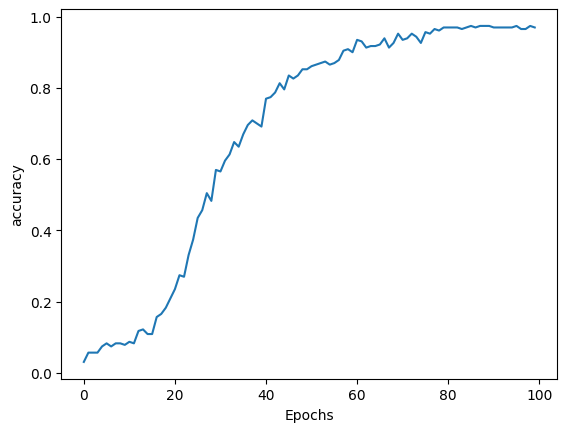

In [ ]:
plot_graphs(history, 'accuracy')


In [ ]:
seed_text = "I've got a bad feeling about this"
next_words = 10

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 32ms/step
I've got a bad feeling about this put an terrible hullabaloo finnerty's mchugh suppose again wall doing
